In [ ]:

import pulp

# Define the model
model = pulp.LpProblem("Maximize_Profit", pulp.LpMaximize)

# Define decision variables
x = pulp.LpVariable('Product_A', lowBound=0, cat='Continuous')
y = pulp.LpVariable('Product_B', lowBound=0, cat='Continuous')

# Objective function
model += 40 * x + 30 * y, "Total_Profit"

# Constraints
model += 2 * x + 1 * y <= 100, "Labor_Constraint"
model += 3 * x + 4 * y <= 120, "Material_Constraint"

# Solve the model
model.solve()

# Results
print(f"Status: {pulp.LpStatus[model.status]}")
print(f"Product A Units: {x.varValue}")
print(f"Product B Units: {y.varValue}")
print(f"Maximum Profit: ₹{pulp.value(model.objective)}")
    

Status: Optimal
Product A Units: 40.0
Product B Units: 0.0
Maximum Profit: ₹1600.0


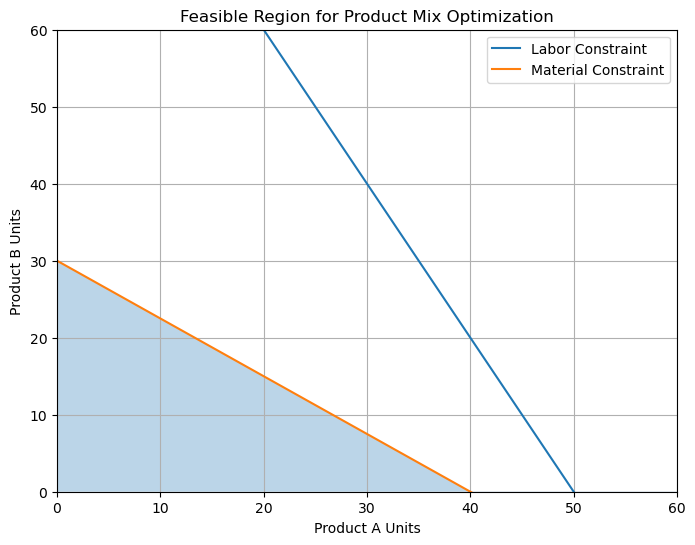

In [2]:

import matplotlib.pyplot as plt
import numpy as np

# Constraint lines
x_vals = np.linspace(0, 60, 400)
y1 = (100 - 2 * x_vals)         # From labor constraint
y2 = (120 - 3 * x_vals) / 4     # From material constraint

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1, label='Labor Constraint')
plt.plot(x_vals, y2, label='Material Constraint')
plt.xlim((0, 60))
plt.ylim((0, 60))
plt.fill_between(x_vals, np.minimum(y1, y2), alpha=0.3)
plt.xlabel('Product A Units')
plt.ylabel('Product B Units')
plt.title('Feasible Region for Product Mix Optimization')
plt.legend()
plt.grid(True)
plt.show()
    